In [1]:
pip install pandas matplotlib scikit-learn tabula-py

Note: you may need to restart the kernel to use updated packages.


Failed to import jpype dependencies. Fallback to subprocess.
No module named 'jpype'


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}
Accuracy: 0.7402597402597403

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81        99
           1       0.66      0.56      0.61        55

    accuracy                           0.74       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.73      0.74      0.74       154



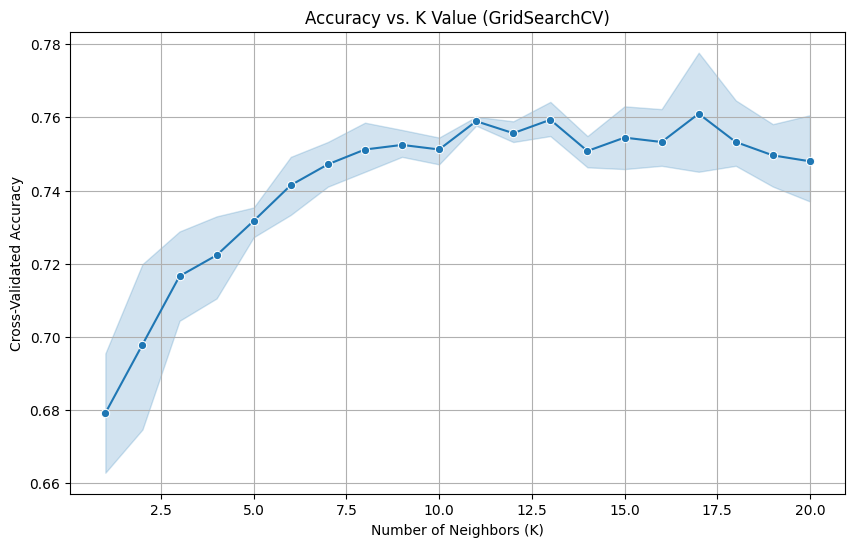

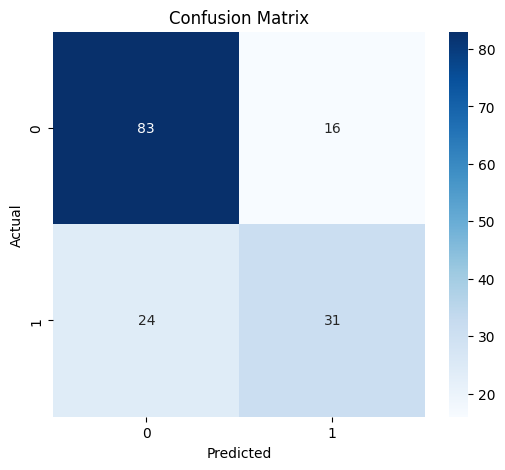

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tabula

# Step 1: Extract table from PDF
file_path = 'document.pdf'
dfs = tabula.read_pdf(file_path, pages='all', multiple_tables=False)
df = dfs[0]
# print("Extracted Data Preview:\n", df.head())

# Step 2: Feature and target separation (adjust columns if needed)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Optional: convert to numeric if necessary
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')  # or keep as categorical depending on task
df = df.dropna()  # Drop missing rows
X = X.fillna(0)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model and GridSearchCV
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(knn, param_grid, cv=kf, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

# Step 5: Results and best model
print("Best Parameters:", grid_search.best_params_)
best_knn = grid_search.best_estimator_

# Test set prediction
y_pred = best_knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 6: Plot accuracy vs k
results_df = pd.DataFrame(grid_search.cv_results_)
k_values = results_df['param_n_neighbors'].astype(int)
mean_scores = results_df['mean_test_score']

plt.figure(figsize=(10, 6))
sns.lineplot(x=k_values, y=mean_scores, marker='o')
plt.title('Accuracy vs. K Value (GridSearchCV)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()

# Step 7: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
